# **TP1 Ingenierie des Connaissances : Implémentation de la logique floue**

-------------------------------------



*  **Realisé Par :** 

BOULJADIANE Loubna

******


# **Théorie et installation**

Remplacement de la bibliothèque FloLib par la bibliothèque scikit-fuzzy!

In [ ]:
pip install scikit-fuzzy

### **La visualisation avec Trapmf pour la represention trapèzoïdale des fonctions d'appartenance**

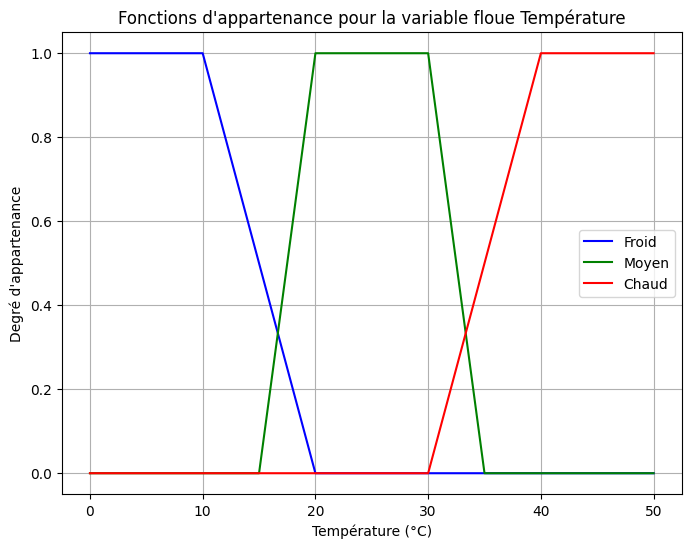

In [ ]:
import numpy as np
import skfuzzy as fuzz
import matplotlib.pyplot as plt

# Définir l'univers de discours pour la température (de 0 à 50 degrés)
x_temperature = np.arange(0, 51, 1)

# Créer les fonctions d'appartenance pour Froid, Moyen et Chaud
froid = fuzz.trapmf(x_temperature, [0, 0, 10, 20])
moyen = fuzz.trapmf(x_temperature, [15, 20, 30, 35])
chaud = fuzz.trapmf(x_temperature, [30, 40, 50, 50])

# Visualiser les fonctions d'appartenance
plt.figure(figsize=(8, 6))
plt.plot(x_temperature, froid, 'b', label='Froid')
plt.plot(x_temperature, moyen, 'g', label='Moyen')
plt.plot(x_temperature, chaud, 'r', label='Chaud')
plt.title('Fonctions d\'appartenance pour la variable floue Température')
plt.xlabel('Température (°C)')
plt.ylabel('Degré d\'appartenance')
plt.legend()
plt.grid(True)
plt.show()

### **La visualisation avec Trimf pour la represention triangulaire des fonctions d'appartenance**

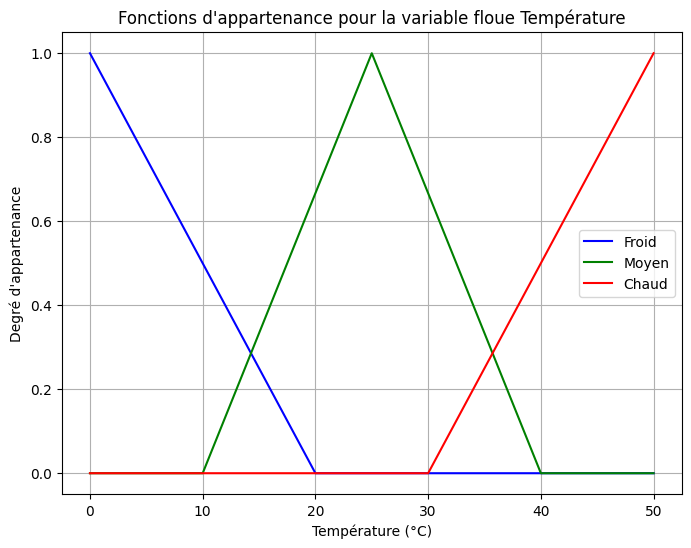

In [ ]:
import numpy as np
import skfuzzy as fuzz
import matplotlib.pyplot as plt

# Définir l'univers de discours pour la température (de 0 à 50 degrés)
x_temperature = np.arange(0, 51, 1)

# Créer les fonctions d'appartenance triangulaires pour Froid, Moyen et Chaud
froid = fuzz.trimf(x_temperature, [0, 0, 20])    # Froid: 0 à 20
moyen = fuzz.trimf(x_temperature, [10, 25, 40])  # Moyen: 10 à 40
chaud = fuzz.trimf(x_temperature, [30, 50, 50])   # Chaud: 30 à 50

# Visualiser les fonctions d'appartenance
plt.figure(figsize=(8, 6))
plt.plot(x_temperature, froid, 'b', label='Froid')
plt.plot(x_temperature, moyen, 'g', label='Moyen')
plt.plot(x_temperature, chaud, 'r', label='Chaud')
plt.title('Fonctions d\'appartenance pour la variable floue Température')
plt.xlabel('Température (°C)')
plt.ylabel('Degré d\'appartenance')
plt.legend()
plt.grid(True)
plt.show()

# **Système flou pour le contrôle de température**

In [ ]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

# 1. Création des variables floues
# Entrée : Température
temperature = ctrl.Antecedent(np.arange(0, 41, 1), 'Température')

# Sortie : Puissance du chauffage
chauffage = ctrl.Consequent(np.arange(0, 101, 1), 'Chauffage')

In [ ]:
# 2. Ajouter des fonctions d'appartenance
# Fonctions d'appartenance pour la température
temperature['Froid'] = fuzz.trimf(temperature.universe, [0, 0, 20])
temperature['Moyen'] = fuzz.trimf(temperature.universe, [15, 25, 35])
temperature['Chaud'] = fuzz.trimf(temperature.universe, [30, 40, 40])

# Fonctions d'appartenance pour la puissance de chauffage
chauffage['Faible'] = fuzz.trimf(chauffage.universe, [0, 0, 50])
chauffage['Moyenne'] = fuzz.trimf(chauffage.universe, [30, 50, 70])
chauffage['Forte'] = fuzz.trimf(chauffage.universe, [50, 100, 100])

In [ ]:
# 3. Implémentation des règles floues
rule1 = ctrl.Rule(temperature['Froid'], chauffage['Forte'])
rule2 = ctrl.Rule(temperature['Moyen'], chauffage['Moyenne'])
rule3 = ctrl.Rule(temperature['Chaud'], chauffage['Faible'])

# Création du système de contrôle flou
heating_ctrl = ctrl.ControlSystem([rule1, rule2, rule3])
system = ctrl.ControlSystemSimulation(heating_ctrl)

# Simulation
input_value = {'Température': 25}  # Par exemple, température ambiante de 25°C
system.input['Température'] = input_value['Température']
system.compute()

# Affichage de la puissance de chauffage
output_value = system.output['Chauffage']
print(f"Puissance du chauffage : {output_value:.2f}%")

Puissance du chauffage : 50.00%


# **Exploitation avancée de la bibliothèque Scikit-fuzzy**

In [ ]:
from skfuzzy import control as ctrl

Définition des variables d'entré et de sortie

In [ ]:
distance = ctrl.Antecedent(np.arange(0, 101, 1), 'Distance')  # Distance de l'obstacle (0 à 100 mètres)
visibilite = ctrl.Antecedent(np.arange(0, 101, 1), 'Visibilité')  # Visibilité (0 à 100%)
vitesse = ctrl.Consequent(np.arange(0, 101, 1), 'Vitesse')  # Vitesse du véhicule (0 à 100 km/h)


Fonction d'appartenance des trois variables

In [ ]:
# Fonctions d'appartenance pour la distance
distance['Très Proche'] = fuzz.trimf(distance.universe, [0, 0, 20])
distance['Proche'] = fuzz.trimf(distance.universe, [10, 30, 50])
distance['Moyenne'] = fuzz.trimf(distance.universe, [30, 50, 70])
distance['Loin'] = fuzz.trimf(distance.universe, [60, 80, 100])
distance['Très Loin'] = fuzz.trimf(distance.universe, [80, 100, 100])

# Fonctions d'appartenance pour la visibilité
visibilite['Très Faible'] = fuzz.trimf(visibilite.universe, [0, 0, 30])
visibilite['Faible'] = fuzz.trimf(visibilite.universe, [20, 40, 60])
visibilite['Moyenne'] = fuzz.trimf(visibilite.universe, [40, 60, 80])
visibilite['Bonne'] = fuzz.trimf(visibilite.universe, [70, 100, 100])

# Fonctions d'appartenance pour la vitesse
vitesse['Très Lente'] = fuzz.trimf(vitesse.universe, [0, 0, 30])
vitesse['Lente'] = fuzz.trimf(vitesse.universe, [20, 40, 60])
vitesse['Modérée'] = fuzz.trimf(vitesse.universe, [40, 60, 80])
vitesse['Rapide'] = fuzz.trimf(vitesse.universe, [60, 80, 100])
vitesse['Très Rapide'] = fuzz.trimf(vitesse.universe, [80, 100, 100])


Etablissemnet des régles floues

In [ ]:
rule1 = ctrl.Rule(distance['Très Proche'] | visibilite['Très Faible'], vitesse['Très Lente'])
rule2 = ctrl.Rule(distance['Proche'] & visibilite['Faible'], vitesse['Lente'])
rule3 = ctrl.Rule(distance['Moyenne'] & visibilite['Moyenne'], vitesse['Modérée'])
rule4 = ctrl.Rule(distance['Loin'] & visibilite['Bonne'], vitesse['Rapide'])
rule5 = ctrl.Rule(distance['Très Loin'] | visibilite['Bonne'], vitesse['Très Rapide'])



Simulation des scénarios

In [ ]:
speed_ctrl = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5])
system = ctrl.ControlSystemSimulation(speed_ctrl)

# 4. Simulation de plusieurs scénarios
def simuler_vitesse(distance_value, visibilite_value):
    system.input['Distance'] = distance_value
    system.input['Visibilité'] = visibilite_value
    system.compute()  # Défuzzification
    return system.output['Vitesse']

# Tester différentes combinaisons de valeurs
scenarios = [(10, 20), (50, 50), (90, 70), (30, 10), (5, 5)]

for distance_value, visibilite_value in scenarios:
    vitesse_recommandee = simuler_vitesse(distance_value, visibilite_value)
    print(f"Distance: {distance_value} m, Visibilité: {visibilite_value}%, Vitesse recommandée: {vitesse_recommandee:.2f} km/h")

Distance: 10 m, Visibilité: 20%, Vitesse recommandée: 11.67 km/h
Distance: 50 m, Visibilité: 50%, Vitesse recommandée: 60.00 km/h
Distance: 90 m, Visibilité: 70%, Vitesse recommandée: 92.22 km/h
Distance: 30 m, Visibilité: 10%, Vitesse recommandée: 10.83 km/h
Distance: 5 m, Visibilité: 5%, Vitesse recommandée: 10.24 km/h


Modification des seuils des fonctions d'appartenances

In [ ]:
# Fonctions d'appartenance pour la distance
distance['Très Proche'] = fuzz.trimf(distance.universe, [0, 0, 15])  # diminution
distance['Proche'] = fuzz.trimf(distance.universe, [15, 18, 40])  # [10,30,50]
visibilite['Très Faible'] = fuzz.trimf(visibilite.universe, [0, 0, 35]) #[0,0,30]
visibilite['Faible'] = fuzz.trimf(visibilite.universe, [30, 40, 60]) #[20,40,60]

Ajout de la regle de prudence pour la vitesse

In [ ]:
# Règle de prudence
rule6 = ctrl.Rule(distance['Moyenne'] & visibilite['Faible'], vitesse['Lente'])


Ajout de la régle de sécurité pour la visibilité

In [ ]:
# Règle de sécurité
rule7 = ctrl.Rule(visibilite['Très Faible'], vitesse['Très Lente'])


Test des differents combinaisons des valeurs (Distance ,Visibilité)

In [ ]:

rule1 = ctrl.Rule(distance['Très Proche'] | visibilite['Très Faible'], vitesse['Très Lente'])
rule2 = ctrl.Rule(distance['Proche'] & visibilite['Faible'], vitesse['Lente'])
rule3 = ctrl.Rule(distance['Moyenne'] & visibilite['Moyenne'], vitesse['Modérée'])
rule4 = ctrl.Rule(distance['Loin'] & visibilite['Bonne'], vitesse['Rapide'])
rule5 = ctrl.Rule(distance['Très Loin'] | visibilite['Bonne'], vitesse['Très Rapide'])
speed_ctrl = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5,rule6,rule7])
system = ctrl.ControlSystemSimulation(speed_ctrl)
def simuler_vitesse(distance_value, visibilite_value):
    system.input['Distance'] = distance_value
    system.input['Visibilité'] = visibilite_value
    system.compute()  # Défuzzification
    return system.output['Vitesse']

# Tester différentes combinaisons de valeurs
scenarios = [(10, 20), (50, 50), (90, 70), (30, 10), (5, 5)]

for distance_value, visibilite_value in scenarios:
    vitesse_recommandee = simuler_vitesse(distance_value, visibilite_value)
    print(f"Distance: {distance_value} m, Visibilité: {visibilite_value}%, Vitesse recommandée: {vitesse_recommandee:.2f} km/h")

Distance: 10 m, Visibilité: 20%, Vitesse recommandée: 12.08 km/h
Distance: 50 m, Visibilité: 50%, Vitesse recommandée: 50.00 km/h
Distance: 90 m, Visibilité: 70%, Vitesse recommandée: 92.22 km/h
Distance: 30 m, Visibilité: 10%, Vitesse recommandée: 10.63 km/h
Distance: 5 m, Visibilité: 5%, Vitesse recommandée: 10.18 km/h


Les résultats ont changés de valeurs par rapport aux simulations précèdentes, ce qui montre que les 2 facteurs: ajustement des seuils des fonctions d'appartenance et l'ajout des 2 règles de prudence et de sécurité affectent les résultats finales de la vitesse.

La visualisation des fonctions d'appartenance (representation triangulaire)

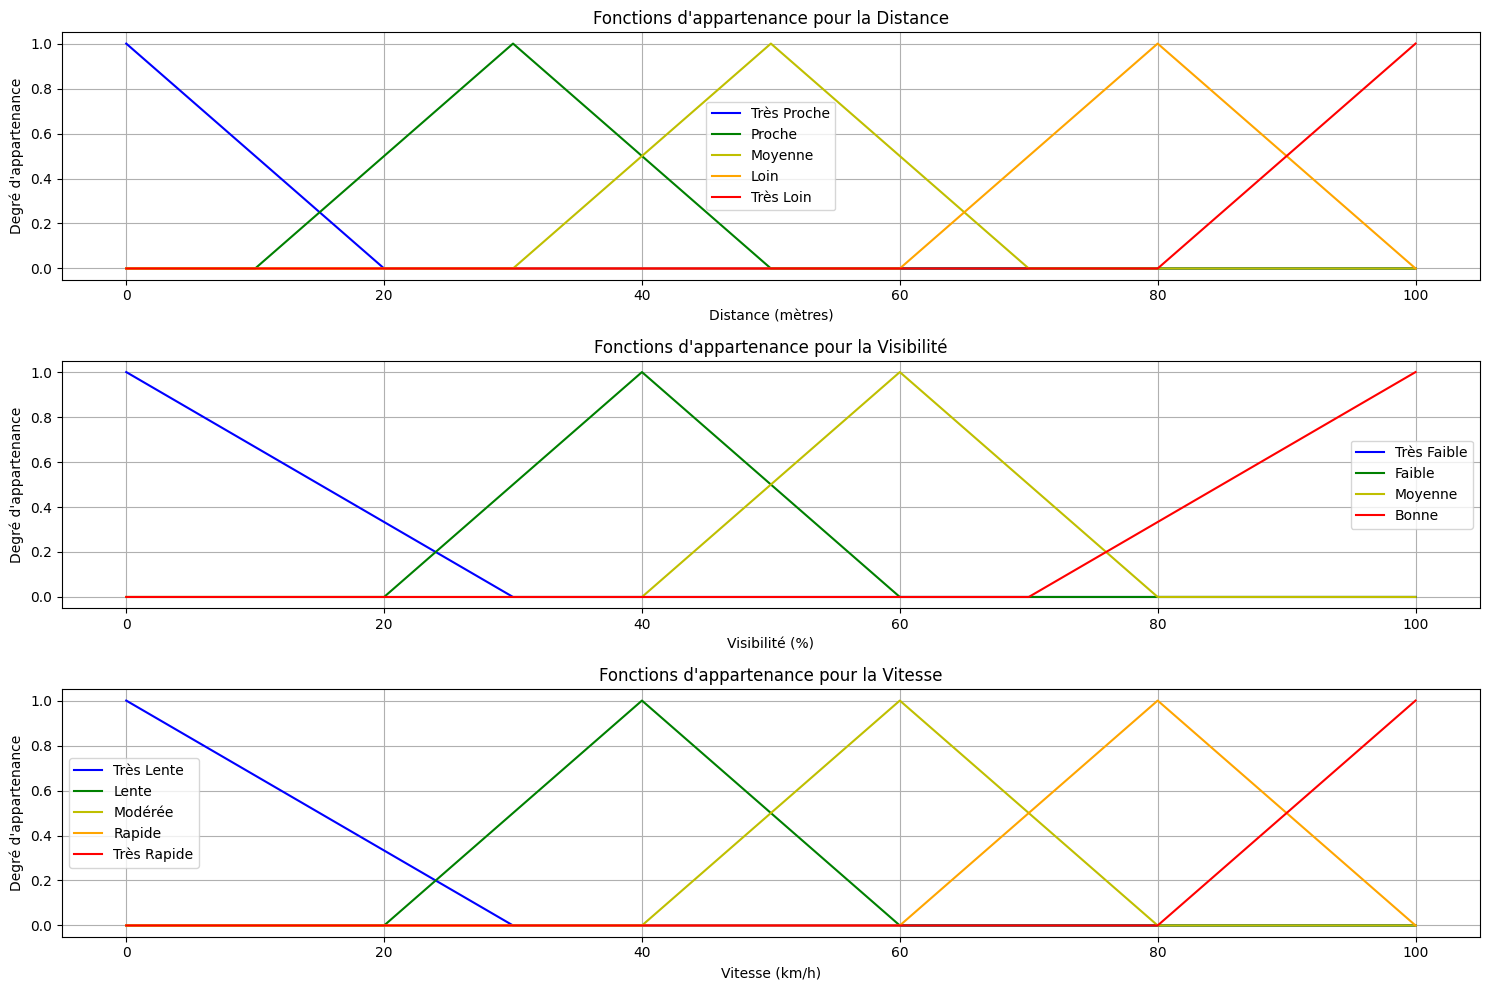

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import skfuzzy as fuzz

# 1. Création des univers pour les variables
distance = np.arange(0, 101, 1)  # Distance de l'obstacle (0 à 100 mètres)
visibilite = np.arange(0, 101, 1)  # Visibilité (0 à 100%)
vitesse = np.arange(0, 101, 1)  # Vitesse du véhicule (0 à 100 km/h)

# 2. Fonctions d'appartenance pour la distance
distance_tres_proche = fuzz.trimf(distance, [0, 0, 20])
distance_proche = fuzz.trimf(distance, [10, 30, 50])
distance_moyenne = fuzz.trimf(distance, [30, 50, 70])
distance_loin = fuzz.trimf(distance, [60, 80, 100])
distance_tres_loin = fuzz.trimf(distance, [80, 100, 100])

# 3. Fonctions d'appartenance pour la visibilité
visibilite_tres_faible = fuzz.trimf(visibilite, [0, 0, 30])
visibilite_faible = fuzz.trimf(visibilite, [20, 40, 60])
visibilite_moyenne = fuzz.trimf(visibilite, [40, 60, 80])
visibilite_bonne = fuzz.trimf(visibilite, [70, 100, 100])

# 4. Fonctions d'appartenance pour la vitesse
vitesse_tres_lente = fuzz.trimf(vitesse, [0, 0, 30])
vitesse_lente = fuzz.trimf(vitesse, [20, 40, 60])
vitesse_moderee = fuzz.trimf(vitesse, [40, 60, 80])
vitesse_rapide = fuzz.trimf(vitesse, [60, 80, 100])
vitesse_tres_rapide = fuzz.trimf(vitesse, [80, 100, 100])

# Visualiser les fonctions d'appartenance pour la Distance
plt.figure(figsize=(15, 10))

# Distance
plt.subplot(3, 1, 1)
plt.plot(distance, distance_tres_proche, 'b', label='Très Proche')
plt.plot(distance, distance_proche, 'g', label='Proche')
plt.plot(distance, distance_moyenne, 'y', label='Moyenne')
plt.plot(distance, distance_loin, 'orange', label='Loin')
plt.plot(distance, distance_tres_loin, 'r', label='Très Loin')
plt.title('Fonctions d\'appartenance pour la Distance')
plt.xlabel('Distance (mètres)')
plt.ylabel('Degré d\'appartenance')
plt.legend()
plt.grid(True)

# Visibilité
plt.subplot(3, 1, 2)
plt.plot(visibilite, visibilite_tres_faible, 'b', label='Très Faible')
plt.plot(visibilite, visibilite_faible, 'g', label='Faible')
plt.plot(visibilite, visibilite_moyenne, 'y', label='Moyenne')
plt.plot(visibilite, visibilite_bonne, 'r', label='Bonne')
plt.title('Fonctions d\'appartenance pour la Visibilité')
plt.xlabel('Visibilité (%)')
plt.ylabel('Degré d\'appartenance')
plt.legend()
plt.grid(True)

# Vitesse
plt.subplot(3, 1, 3)
plt.plot(vitesse, vitesse_tres_lente, 'b', label='Très Lente')
plt.plot(vitesse, vitesse_lente, 'g', label='Lente')
plt.plot(vitesse, vitesse_moderee, 'y', label='Modérée')
plt.plot(vitesse, vitesse_rapide, 'orange', label='Rapide')
plt.plot(vitesse, vitesse_tres_rapide, 'r', label='Très Rapide')
plt.title('Fonctions d\'appartenance pour la Vitesse')
plt.xlabel('Vitesse (km/h)')
plt.ylabel('Degré d\'appartenance')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()
